# Classification Prediction

In [637]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from tqdm import tqdm
import pandas as pd
import humanize
from datetime import datetime, timedelta
import time
import numpy as np
import seaborn as sns
import ast
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [638]:
CATEGORIES = [1935, 3307, 11000, 260000]

In [639]:
df = pd.read_csv("training_data.csv")
df = df.drop(columns=df.columns[0])
df.head()
print(len(df))

1567


In [640]:
def print_score(pred, true):
    print("Mean Squared Error:".ljust(22," "),round(mean_squared_error(true, pred),5))
    print("Mean Absolute Error:".ljust(22," "), round(mean_absolute_error(true, pred),5))
    
def convert(seconds):
    return humanize.naturaldelta(timedelta(seconds=seconds))

def show_diff(predictions,y_test,n=25):
    print("PREDICTION\t RESULT\t\t DIFFERENCE")
    print("-"*45)
    for i in range(0,n):
        print(predictions[i], "\t",y_test[i], "\t", y_test[i] - predictions[i])

def show_plots(predictions, y_test, s=4):
    plt.subplot(211)
    plt.title("Test Results and Predictions")
    plt.scatter(range(len(y_test)),y_test,s=s)
    plt.xlabel("X_test[i]")
    plt.ylabel("correct answer")
    plt.subplot(212)
    plt.scatter(range(len(predictions)),predictions,s=s)
    plt.ylabel("predictions")
    plt.show()

pred = {}

## Remove Outliers from DataFrame
any simulations over 26000 seconds is what this just about works out to be

In [641]:
import pandas as pd
import numpy as np
from scipy import stats

df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [642]:
df.describe()

,runtime,sim_time,surface_moisture,timestep,wind_direction,wind_speed,canopy_moisture,run_max_mem_rss_bytes,area,steps_fire
count,1442.000000,1442.000000,1442.000000,1442.0,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.0
mean,6396.604022,0.103108,0.400160,1.0,0.459015,0.154201,0.741823,0.087422,0.098965,1.0
std,5750.241251,0.067780,0.201488,0.0,0.222123,0.121748,0.167932,0.055161,0.095449,0.0
min,10.000000,0.041846,0.000000,1.0,0.000000,0.000000,0.250000,0.000000,0.000000,1.0
25%,1935.000000,0.050966,0.272727,1.0,0.305913,0.051458,0.750000,0.045511,0.061078,1.0
50%,3307.000000,0.076433,0.303030,1.0,0.383033,0.144583,0.750000,0.100226,0.061357,1.0
75%,10958.250000,0.128999,0.606061,1.0,0.652956,0.237708,0.833333,0.109813,0.091384,1.0
max,25866.000000,0.309009,0.909091,1.0,1.000000,0.583333,1.000000,0.248807,0.354496,1.0


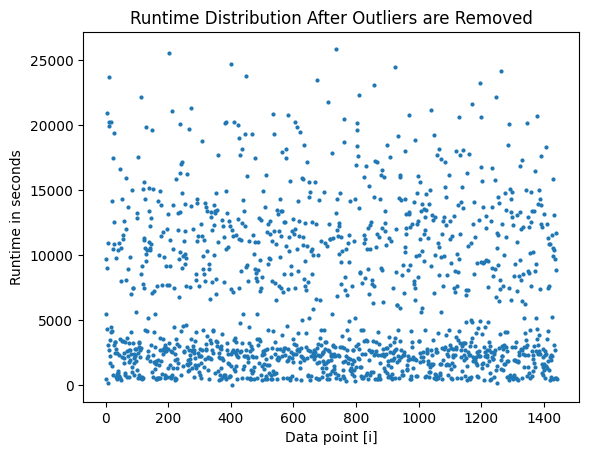

In [643]:
plt.title("Runtime Distribution After Outliers are Removed")
plt.scatter(range(len(df["runtime"])),df["runtime"],s=4)
plt.ylabel("Runtime in seconds")
plt.xlabel("Data point [i]")
plt.show()

<Axes: xlabel='runtime', ylabel='Count'>

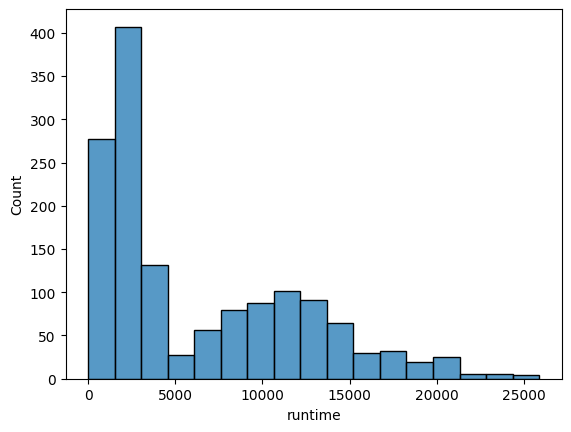

In [644]:
sns.histplot(df["runtime"])

In [645]:
for i in [100, 2000, 3300, 11000, 26000]:
    print(f"{convert(i)}")

a minute
33 minutes
55 minutes
3 hours
7 hours


In [646]:
def categorize(seconds):
    global CATEGORIES
    for i in range(len(CATEGORIES)):
        if (seconds <= CATEGORIES[i]):
            return i

def print_categories():
    global CATEGORIES
    for i in range(len(CATEGORIES)):
        print(f"{convert(CATEGORIES[i])}   \t{i}")

In [647]:
runtime_categories = df.apply(lambda row: categorize(row["runtime"]), axis=1)
# df.insert(0, "runtime_ca", runtime_categories)
df["runtime_ca"] = runtime_categories
df.head()

,runtime,sim_time,surface_moisture,timestep,wind_direction,wind_speed,canopy_moisture,run_max_mem_rss_bytes,area,steps_fire,runtime_ca
0,5475,0.050966,0.303030,1.0,0.241645,0.051458,0.833333,0.074582,0.046235,1.0,2
1,9737,0.128999,0.151515,1.0,0.305913,0.144583,0.750000,0.100625,0.293084,1.0,2
2,501,0.044546,0.363636,1.0,0.768638,0.051458,0.791667,0.005656,0.011231,1.0,0
3,4325,0.055708,0.303030,1.0,0.426735,0.083333,0.916667,0.099840,0.131749,1.0,2
4,9008,0.170005,0.454545,1.0,1.000000,0.144583,0.833333,0.171107,0.061357,1.0,2


32 minutes 	 0
55 minutes 	 1
3 hours 	 2
3 days 	 3


runtime_ca
2    364
0    361
1    360
3    357
Name: count, dtype: int64

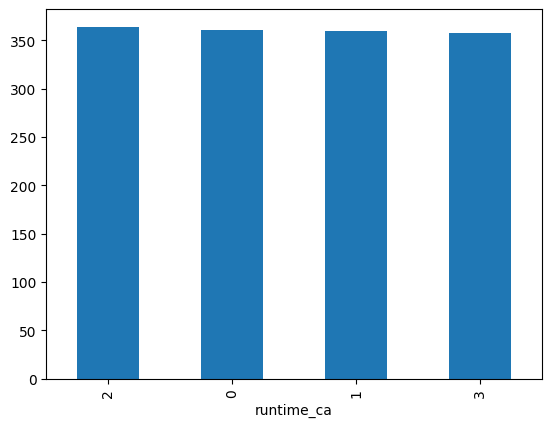

In [648]:
for i in range(len(CATEGORIES)):
    print(convert(CATEGORIES[i]),"\t",i)
df["runtime_ca"].value_counts().plot(kind="bar")
df["runtime_ca"].value_counts()


In [649]:
y = df["runtime_ca"]
X = df.drop(columns=["runtime","runtime_ca"])
X.tail()

,sim_time,surface_moisture,timestep,wind_direction,wind_speed,canopy_moisture,run_max_mem_rss_bytes,area,steps_fire
1562,0.045317,0.303030,1.0,0.228792,0.051458,0.750000,0.000000,0.000000,1.0
1563,0.128738,0.151515,1.0,0.460154,0.125958,0.833333,0.100649,0.293084,1.0
1564,0.044546,0.212121,1.0,0.691517,0.051458,0.791667,0.005659,0.011231,1.0
1565,0.309009,0.454545,1.0,0.228792,0.144583,0.750000,0.171151,0.061357,1.0
1566,0.045317,0.303030,1.0,0.305913,0.051458,0.750000,0.000155,0.000000,1.0


In [650]:
TEST_RATIO = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_RATIO,random_state=42)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(len(X_train), len(X_test), len(y_train), len(y_test))

1153 289 1153 289


# Classification Approaches
- K Means clustering
- SVM
- decision tree
  

# K Means Clustering

In [651]:
from sklearn.cluster import KMeans

# ------ experiment with cluster amount ---------- #
n_clusters = len(CATEGORIES)
# ------ experiment with cluster amount ---------- #

model = KMeans(n_clusters=n_clusters, n_init=10)
model = model.fit(X_train,y_train)

In [652]:
pred["Kmeans"] = model.predict(X_test)

In [653]:
print_score(pred["Kmeans"], y_test)

Mean Squared Error:    2.00692
Mean Absolute Error:   1.04498


In [654]:
accuracy_score(y_true=y_test,y_pred=pred["Kmeans"])

0.3494809688581315

15% is very bad accuracy, something must be wrong with my approach to using K means here but I am not sure so I will try another model. Could be an input data problem but I am skeptical of that

# SVM

In [655]:
from sklearn.svm import SVC
model = SVC(kernel='rbf')
model = model.fit(X_train,y_train)

In [656]:
pred["SVM"] = model.predict(X_test)
accuracy_score(y_true=y_test,y_pred=pred["SVM"])

0.6539792387543253

# Decision Tree Classifier

In [657]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model = model.fit(X_train, y_train)

In [658]:
pred["DecisionTree"] = model.predict(X_test)
accuracy_score(y_true=y_test,y_pred=pred["DecisionTree"])

0.6539792387543253

# Logistic Regression

currently not working

In [659]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model = model.fit(X_train, y_train)

/root/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [660]:
pred["LogisticRegression"] = model.predict(X_test)
accuracy_score(y_true=y_test,y_pred=pred["LogisticRegression"])

0.5813148788927336

# Stochastic Gradient Descent

In [661]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier()
model = model.fit(X_train, y_train)

In [662]:
pred["SGD"] = model.predict(X_test)
accuracy_score(y_true=y_test,y_pred=pred["SGD"])

0.6020761245674741

# K Nearest Neighbor

In [663]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=len(CATEGORIES))
model = model.fit(X_train, y_train)

In [664]:
pred["kNN"] = model.predict(X_test)
accuracy_score(y_true=y_test,y_pred=pred["kNN"])

0.6505190311418685

# Random Forest


In [665]:
from sklearn.ensemble import RandomForestClassifier
# ----------------- #
n = 100
# ----------------- #
model = RandomForestClassifier(n_estimators=n)
model = model.fit(X_train, y_train)

In [666]:
pred["RandomForest"] = model.predict(X_test)
accuracy_score(y_true=y_test,y_pred=pred["RandomForest"])

0.7231833910034602

# Gradient Boosting

100%|███████████████████████████████████████████| 25/25 [00:02<00:00,  8.38it/s]


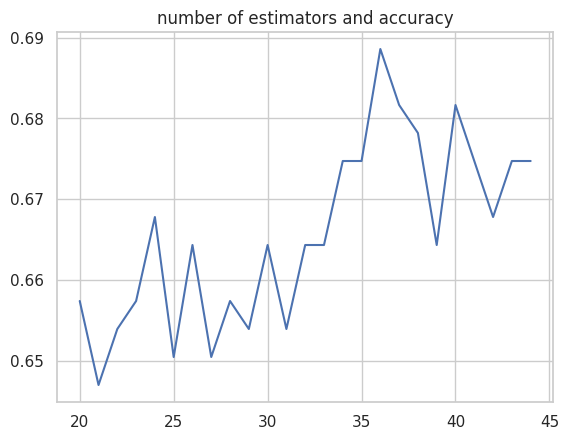

In [817]:
from sklearn.ensemble import GradientBoostingClassifier
# ----------------- #
n = 35
# ----------------- #

ex, why = [], []
for i in tqdm(range(20,45,1)):
    model = GradientBoostingClassifier(max_depth=3, learning_rate=1, n_estimators = i)
    model = model.fit(X_train, y_train)
    s = accuracy_score(y_true=y_test,y_pred=model.predict(X_test))
    ex.append(i)
    why.append(s)
plt.title("number of estimators and accuracy")
plt.plot(ex,why)

In [805]:
pred["GradientBoosting"] = model.predict(X_test)
accuracy_score(y_true=y_test,y_pred=pred["GradientBoosting"])

0.7058823529411765

# LGBM

In [669]:
# !pip3 install --user lightgbm

In [670]:
from lightgbm import LGBMClassifier
# ----------------- #
n = 100
# ----------------- #
model = LGBMClassifier(n_estimators = n)
model = model.fit(X_train, y_train)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000308 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 406
[LightGBM] [Info] Number of data points in the train set: 1153, number of used features: 7
[LightGBM] [Info] Start training from score -1.359763
[LightGBM] [Info] Start training from score -1.418911
[LightGBM] [Info] Start training from score -1.376799
[LightGBM] [Info] Start training from score -1.390640
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [671]:
pred["LGBM"] = model.predict(X_test)
accuracy_score(y_true=y_test,y_pred=pred["LGBM"])

0.6851211072664359

# XGB

In [672]:
# !pip3 install --user xgboost

In [673]:
from xgboost.sklearn import XGBClassifier
# ----------------- #
n = 100
# ----------------- #
model = XGBClassifier(n_estimators = n)
model = model.fit(X_train, y_train)

In [674]:
pred["XGB"] = model.predict(X_test)
accuracy_score(y_true=y_test,y_pred=pred["XGB"])

0.6851211072664359

# Gradient Boosting

# Compare Models

In [675]:
# compare = pd.DataFrame(pred)
compare = pd.DataFrame({
    "name":pred.keys(), 
    "accuracy":np.nan,
    "mse":np.nan,
})
compare = compare.set_index("name")

In [676]:
compare["accuracy"] = compare.apply(lambda row: accuracy_score(y_pred=pred[row.name],y_true=y_test)*100,axis=1)
compare["mse"] = compare.apply(lambda row: mean_squared_error(y_pred=pred[row.name],y_true=y_test),axis=1)
compare["mean absolute"] = compare.apply(lambda row: mean_absolute_error(y_pred=pred[row.name],y_true=y_test),axis=1)

### So how do the models stack up to each other?

In [677]:
compare

,accuracy,mse,mean absolute
name,,,
Kmeans,34.948097,2.006920,1.044983
SVM,65.397924,0.377163,0.356401
DecisionTree,65.397924,0.435986,0.373702
LogisticRegression,58.131488,0.501730,0.446367
SGD,60.207612,0.581315,0.456747
kNN,65.051903,0.435986,0.373702
RandomForest,72.318339,0.366782,0.304498
GradientBoosting,69.896194,0.339100,0.311419
LGBM,68.512111,0.384083,0.335640


so Kmeans is pretty bad, Decision trees and SVM and kNN appear to be the best

In [739]:
print_categories()

32 minutes   	0
55 minutes   	1
3 hours   	2
3 days   	3


note: look into principal component analysis

# confusing chart stuff

In [770]:
a = pd.Series(pred["LGBM"]).value_counts()
b = pd.Series(y_test).value_counts()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,Male


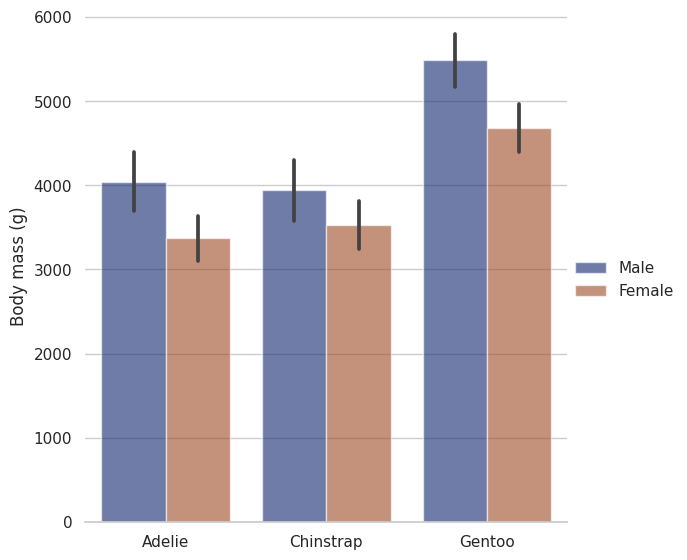

In [743]:
sns.set_theme(style="whitegrid")

penguins = sns.load_dataset("penguins")
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=penguins, kind="bar",
    x="species", y="body_mass_g", hue="sex",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")
penguins.tail(5)

In [756]:
model_val_counts = pd.Series(pred["XGB"]).value_counts()
y_test_val_counts = pd.Series(y_test).value_counts()
c = dict(model_val_counts)
d = dict(y_test_val_counts)

merged_dict = {}
for i in range(0,len(c)):
    merged_dict[i] = [c[i], d[i]]

data = pd.DataFrame(merged_dict)
# data["hue"] = [0,1]
data = data.T

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,Male


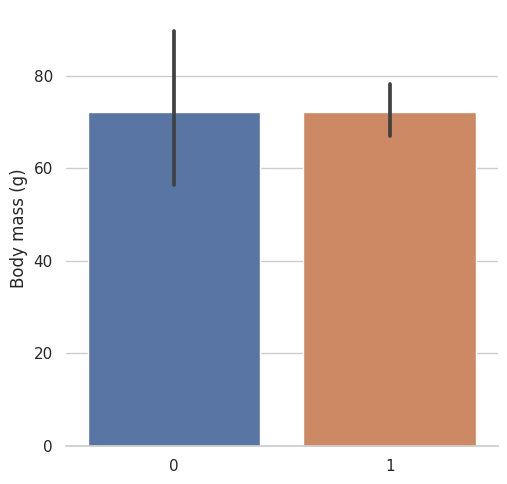

In [758]:
sns.set_theme(style="whitegrid")

penguins = sns.load_dataset("penguins")
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=data, kind="bar"
    # x="species", y="body_mass_g", hue="sex",
    # errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
# g.legend.set_title("")
penguins.tail(5)


In [759]:
data

,0,1
0,62,65
1,99,81
2,51,73
3,77,70
